## DETERMING THE COLLEGE SCORECARD:

Our Objective: 
Determine a Score for each college in the United States, based on various features. College Scorecards make it easier for students to search for a college that may be a good fit for them. 
They can use the College Scorecard to find out more about a college's affordability and value so they can make more informed decisions about which college to attend.
Data Overview:
The dataset has been retrieved from US Government Site. These data are provided through federal reporting from institutions, data on federal financial aid, and tax information. These data provide insights into the performance of institutions that receive federal financial aid dollars, and the outcomes of the students of those institutions. A complete set of these data for all active Integrated Postsecondary Education Data System (IPEDS) Title IV non-administrative unit institutions are available on the Scorecard data webpage and API1. A subset of these data elements is displayed on the consumer-facing College Scorecard website for the subset of currently operating institutions whose predominant undergraduate awards are: 
• Associate degrees
• Bachelor’s degrees
• Certificates (for only those institutions offering and awarding Associate and/or Bachelor’s degrees). 
Many data elements are drawn directly from, or derived from, data reported to the IPEDS. 2 Note that some colleges report combined data that pertain to more than one IPEDS institution. The reporting institution (called the “parent”) also indicates an estimated proportion of the data that applies to each of the institutions for which it is reporting (called “child” institutions). In the Scorecard data, these proportions are used to allocate data reported by parent institutions to the child institutions to simplify both consumer and research use of the data.
Data Source: https://catalog.data.gov/dataset/college-scorecard


## Project Client:
For this project, we have assumed that the US government wants to develop an application that can give the college applicants a good idea about how much value they can get on their investment. The score will be assigned based on features such as 'Affordability' and 'Number of Placements done for the Alumni' etc.


## Initial Assumptions Made:
Our dataset contains 295028 Null values. We assume that the data is missing completely at random (i.e., the events that lead to any particular data-item being missing are independent both of observable variables and of unobservable parameters of interest, and occur entirely at random. When data are MCAR, the analysis performed on the data is unbiased; however, data are rarely MCAR).


In [1]:
#Importing all necessary packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas import read_excel, merge
from IPython.core.display import HTML
css_file = 'style.css'
from numpy import nan
import sklearn
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pylab as pl
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.preprocessing import StandardScaler

#### Reading Dataset into Pandas Dataframe

In [5]:
df = pd.read_csv('Final_Dataset.csv',sep=' ')
df.head()

,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,...,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV
0,0,3,3,2,12.0,0.0,0.0,0.0,0.0,0.0,...,20676.000000,21980.000000,24681.0,0.1992,0.8608,0.54012,0.461533,0.27298,0.4633,0.0141
1,0,2,2,1,41.0,0.0,1.0,0.0,0.0,0.0,...,21999.500000,24233.000000,24231.0,0.6050,0.6538,0.54440,0.230767,0.20630,0.3058,0.3604
2,0,2,3,2,32.0,1.0,0.0,0.0,0.0,0.0,...,23323.000000,26486.000000,23781.0,0.9048,0.4468,0.54860,0.000000,0.25940,0.9249,0.1294
3,0,3,4,3,12.0,0.0,0.0,0.0,0.0,0.0,...,23408.000000,27628.000000,23331.0,0.6922,0.4400,0.55280,0.125000,0.31250,0.7304,0.6109
4,0,2,2,1,32.0,0.0,0.0,0.0,0.0,0.0,...,23832.666667,26274.333333,22881.0,0.4928,0.4823,0.55700,0.250000,0.36560,0.2128,0.2896


In [158]:
df.describe()

,UNITID,OPEID,OPEID6,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,...,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV
count,7.593000e+03,7.593000e+03,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7147.000000,7147.000000,7147.000000,...,3287.000000,2686.000000,2138.000000,6835.000000,2245.000000,3766.000000,1392.000000,2128.000000,6835.000000,6788.000000
mean,1.765726e+06,1.910166e+06,16441.276307,0.009219,1.810088,2.202292,2.192282,19.656359,0.014272,0.014691,...,20289.748403,23030.454579,25517.280636,0.521227,0.711980,0.686508,0.471825,0.552693,0.508921,0.410651
std,6.771661e+06,3.516382e+06,14088.868371,0.095578,1.031903,1.318152,0.835941,9.415183,0.118617,0.120323,...,7061.082071,6703.112694,8046.285002,0.224468,0.192955,0.182598,0.295555,0.262058,0.281004,0.234110
min,1.006540e+05,1.002000e+05,1002.000000,0.000000,0.000000,0.000000,1.000000,-3.000000,0.000000,0.000000,...,-7086.000000,-1061.000000,725.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000400
25%,1.752630e+05,3.402000e+05,3395.000000,0.000000,1.000000,1.000000,1.000000,12.000000,0.000000,0.000000,...,15870.500000,18660.750000,20040.500000,0.350050,0.626800,0.571400,0.285700,0.380350,0.313850,0.234625
50%,2.318730e+05,1.054211e+06,10490.000000,0.000000,2.000000,2.000000,2.000000,21.000000,0.000000,0.000000,...,19921.000000,22790.500000,24573.000000,0.509200,0.744200,0.692300,0.466700,0.500000,0.568200,0.394250
75%,4.496120e+05,3.010617e+06,26092.000000,0.000000,3.000000,4.000000,3.000000,22.000000,0.000000,0.000000,...,24639.000000,27036.500000,29453.250000,0.697950,0.834300,0.818200,0.666700,0.750000,0.728150,0.577475
max,4.862110e+07,8.209884e+07,42542.000000,1.000000,4.000000,4.000000,3.000000,43.000000,1.000000,1.000000,...,95017.000000,91832.000000,95165.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Following are the identified outliers from the observed Dataset:
##### 1:  NPT43_PRIV
##### 2:  NPT44_PRIV
##### 3: NPT45_PRIV	
##### 4: NPT4_PUB
##### 5: NPT41_PUB
##### 6: NPT43_PUB
##### 7: NPT44_PUB
##### 8: NPT45_PUB
##### 9: NPT41_PRIV
##### 10: NPT42_PRIV 
##### 11: NPT43_PRIV
##### 12: NPT44_PRIV
##### 13: NPT45_PRIV

## Why we didn’t drop the outliers?
What we observe from the dimensions (that have outliers) is that most outliers are because some colleges impose tuition fees that are far above the average mean imposed by other colleges for particular student’s income groups. In my opinion, college ranking should be impacted if the college does not provide any scholarships to low-income students. Hence, we decided that college fees charges for different income groups is a valuable information to retain and therefore we do not drop the outlier.


In [159]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.describe())

             UNITID         OPEID        OPEID6         HCM2      PREDDEG  \
count  7.593000e+03  7.593000e+03   7593.000000  7593.000000  7593.000000   
mean   1.765726e+06  1.910166e+06  16441.276307     0.009219     1.810088   
std    6.771661e+06  3.516382e+06  14088.868371     0.095578     1.031903   
min    1.006540e+05  1.002000e+05   1002.000000     0.000000     0.000000   
25%    1.752630e+05  3.402000e+05   3395.000000     0.000000     1.000000   
50%    2.318730e+05  1.054211e+06  10490.000000     0.000000     2.000000   
75%    4.496120e+05  3.010617e+06  26092.000000     0.000000     3.000000   
max    4.862110e+07  8.209884e+07  42542.000000     1.000000     4.000000   

           HIGHDEG      CONTROL       LOCALE         HBCU          PBI  \
count  7593.000000  7593.000000  7147.000000  7147.000000  7147.000000   
mean      2.202292     2.192282    19.656359     0.014272     0.014691   
std       1.318152     0.835941     9.415183     0.118617     0.120323   
min       

In [160]:
df.shape

(7593, 123)

##### Dropping all columns that whose columns have all NULL values

In [161]:
# Dropping all columns that whose columns have all NULL values
df= df.dropna(axis=1, how='all')

##### Displaying a list of all NULL values across all columns

In [162]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

UNITID                       0
OPEID                        0
OPEID6                       0
INSTNM                       0
CITY                         0
STABBR                       0
INSTURL                     20
NPCURL                     518
HCM2                         0
PREDDEG                      0
HIGHDEG                      0
CONTROL                      0
LOCALE                     446
HBCU                       446
PBI                        446
ANNHI                      446
TRIBAL                     446
AANAPII                    446
HSI                        446
NANTI                      446
MENONLY                    446
WOMENONLY                  446
RELAFFIL                  6684
SATVR25                   6400
SATVR75                   6400
SATMT25                   6391
SATMT75                   6391
SATWR25                   6860
SATWR75                   6860
SATVRMID                  6400
SATMTMID                  6391
SATWRMID                  6860
ACTCM25 

## Data Preprocessing:
Our dataset contains 7593 rows where each row represents details of a particular college (in U.S.). Also our dataset contains 123 columns in which we have filtered out 108 dimensions that help us in determining the overall value of that particular college. Our dataset contains 295028 Null values. If I attempt to drop all rows from our dataset then we are left with only 13 dimensions or columns which is a massive loss of information which is unacceptable for any further model that we build on this dataset. Hence, in order to remedy this situation, we use Linear Interpolation of missing data. 


In [163]:
#Linear Interpolation for missing data: ‘linear’: ignore the index and treat the values as equally spaced. This is the only 
df = df.interpolate(method='linear')

##### Plotting the Linear Interpolation of the missing data

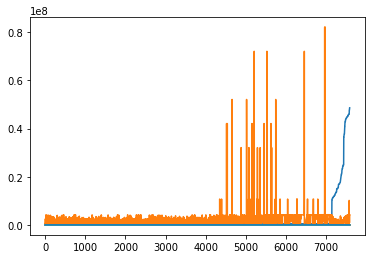

In [164]:
#Plotting the Linear Interpolation of the missing data
df.plot(legend=False)

###### The spikes in the data represent outliers in our dataset 

In [165]:
plt.show()

##### Rechecking the Status of Missing values

In [166]:
#After applying Interpolate Checking the number of Null Values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

UNITID                       0
OPEID                        0
OPEID6                       0
INSTNM                       0
CITY                         0
STABBR                       0
INSTURL                     20
NPCURL                     518
HCM2                         0
PREDDEG                      0
HIGHDEG                      0
CONTROL                      0
LOCALE                       0
HBCU                         0
PBI                          0
ANNHI                        0
TRIBAL                       0
AANAPII                      0
HSI                          0
NANTI                        0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     2
SATVR25                      0
SATVR75                      0
SATMT25                      0
SATMT75                      0
SATWR25                      0
SATWR75                      0
SATVRMID                     0
SATMTMID                     0
SATWRMID                     0
ACTCM25 

##### Checking the data types of all the columns

In [167]:
#Finding out the datatypes of the dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

UNITID                      int64
OPEID                       int64
OPEID6                      int64
INSTNM                     object
CITY                       object
STABBR                     object
INSTURL                    object
NPCURL                     object
HCM2                        int64
PREDDEG                     int64
HIGHDEG                     int64
CONTROL                     int64
LOCALE                    float64
HBCU                      float64
PBI                       float64
ANNHI                     float64
TRIBAL                    float64
AANAPII                   float64
HSI                       float64
NANTI                     float64
MENONLY                   float64
WOMENONLY                 float64
RELAFFIL                  float64
SATVR25                   float64
SATVR75                   float64
SATMT25                   float64
SATMT75                   float64
SATWR25                   float64
SATWR75                   float64
SATVRMID      

##### Feature extraction: In this step, only the relevant features from the dataset, that are play a role in determining the overall value of a college. 

In [168]:
#Copying the contents of df into a dataframe d
d = df.iloc[:,8:116]
d = d.ffill()

In [169]:
#Dropping all NULL values from the dataframe d
d = d.dropna()

##### Rechecking the Status of Missing values

In [170]:
#Checking the number of Null Values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(d.isnull().sum())

HCM2            0
PREDDEG         0
HIGHDEG         0
CONTROL         0
LOCALE          0
HBCU            0
PBI             0
ANNHI           0
TRIBAL          0
AANAPII         0
HSI             0
NANTI           0
MENONLY         0
WOMENONLY       0
RELAFFIL        0
SATVR25         0
SATVR75         0
SATMT25         0
SATMT75         0
SATWR25         0
SATWR75         0
SATVRMID        0
SATMTMID        0
SATWRMID        0
ACTCM25         0
ACTCM75         0
ACTEN25         0
ACTEN75         0
ACTMT25         0
ACTMT75         0
ACTWR25         0
ACTWR75         0
ACTCMMID        0
ACTENMID        0
ACTMTMID        0
ACTWRMID        0
SAT_AVG         0
SAT_AVG_ALL     0
PCIP01          0
PCIP03          0
PCIP04          0
PCIP05          0
PCIP09          0
PCIP10          0
PCIP11          0
PCIP12          0
PCIP13          0
PCIP14          0
PCIP15          0
PCIP16          0
PCIP19          0
PCIP22          0
PCIP23          0
PCIP24          0
PCIP25          0
PCIP26    

##### Checking the number of rows and columns in the dataframe

In [171]:
d.shape

(7583, 108)

### Making Visualizations on the dataset

###### Resetting the size parameters of the graph to be displayed 

In [17]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


In [173]:
#Making a copy of dataframe d to x
x = d.copy()

#### Finding out what percent of U.S. Colleges comply to Hieghtened Cash Management

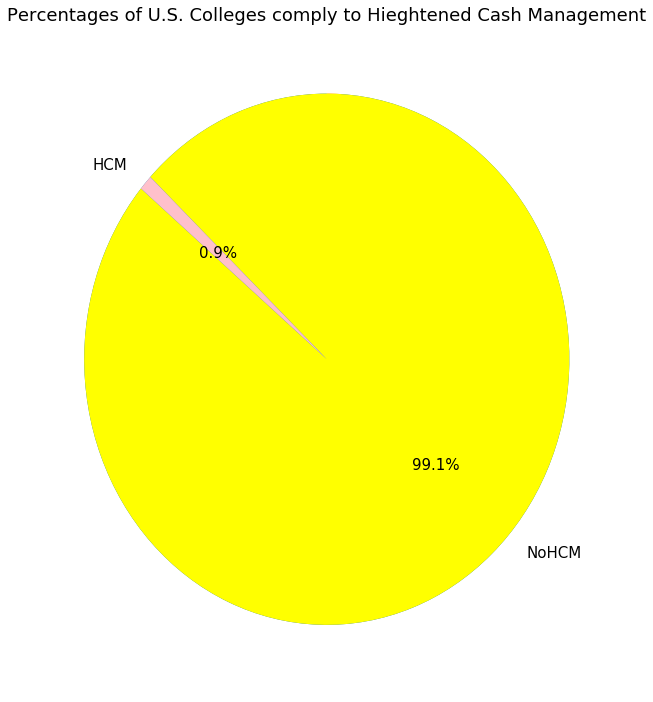

In [210]:
# Counting the number of colleges providing HCM as oppossed to not providing HCM
NoHCM = x.HCM2.value_counts()[0]
HCM = x.HCM2.value_counts()[1]

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

#series = pd.Series(HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY, index=['HBCU','PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY','WOMENONLY'], name='series')
labels = 'NoHCM','HCM'
sizes = [NoHCM,HCM]

# Plot
patches, texts = plt.pie(sizes, startangle=90)
#plt.legend(labels, loc="best")
plt.title('Percentages of U.S. Colleges comply to Hieghtened Cash Management')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['yellow', 'pink'])
plt.axis()
plt.tight_layout()
plt.show()

#### Filtering out the names of the institutions that comply with HCM

In [178]:
dx = pd.read_csv('Most-Recent-Cohorts-Scorecard-Elements.csv')
dx.loc[dx['HCM2'] == 1, 'INSTNM']

128                              Arkansas Baptist College
281                               Milan Institute-Visalia
363                                    Lincoln University
503                                South Baylo University
571                               Glenwood Beauty Academy
806                            Taylor Technical Institute
849                                  Carver Bible College
916                       Med-Assist School of Hawaii Inc
917                              World Medicine Institute
960            La James International College-East Moline
1223                           Hamilton Technical College
1230           American College of Hairstyling-Des Moines
1237           La James International College-Cedar Falls
1238              La James International College-Johnston
1240              La James International College-Ft Dodge
1260             La James International College-Davenport
1261             La James International College-Iowa City
1418          

#### Resetting the size parameters of the graph to be displayed to 20*20

In [185]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [15.0, 15.0]


##### Displaying the area plot of the distribution of those colleges whose populations are predominantly ethinic minorities

In [186]:
#Creating pie chart for colleges whose populations are predominantly ethinic minorities
#Taking the sum of each chunk 
HBCU=x['HBCU'].sum()
PBI=x['PBI'].sum()
ANNHI= x['ANNHI'].sum()
TRIBAL= x['TRIBAL'].sum()
AANAPII= x['AANAPII'].sum()
HSI = x['HSI'].sum()
NANTI = x['NANTI'].sum()
MENONLY = x['MENONLY'].sum()
WOMENONLY = x['WOMENONLY'].sum()


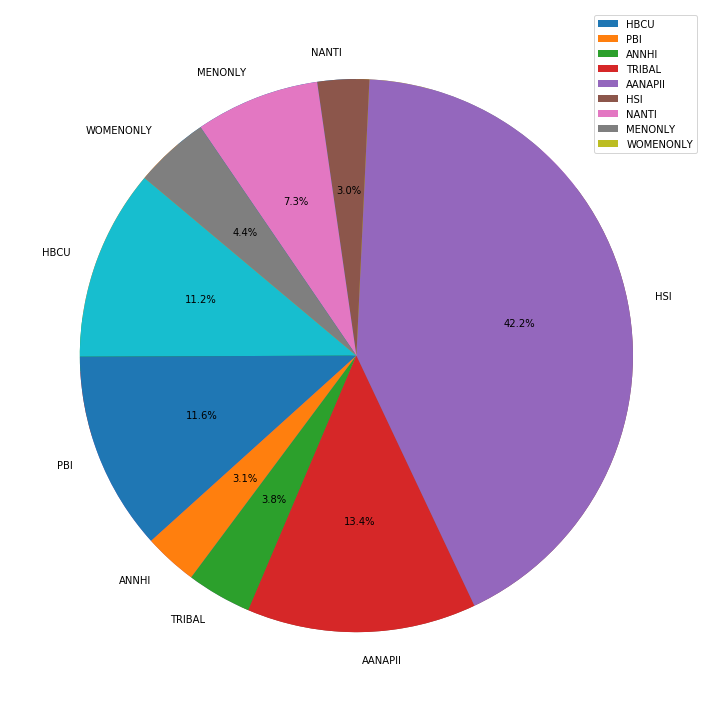

In [187]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.0

#series = pd.Series(HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY, index=['HBCU','PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY','WOMENONLY'], name='series')
labels = 'HBCU','PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY','WOMENONLY'
sizes = [HBCU, PBI, ANNHI, TRIBAL, AANAPII,HSI,NANTI,MENONLY,WOMENONLY]

# Plot
patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis()
plt.tight_layout()
plt.show()

##### We observe that Hispanic Serving Institutions (HSI) are much more in number as compared to other minority colleges  

##### Resetting the size parameters of the graph to 10*10

In [188]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 10.0]


##### Displaying the distribution of SAT scores of students in the form of box plots

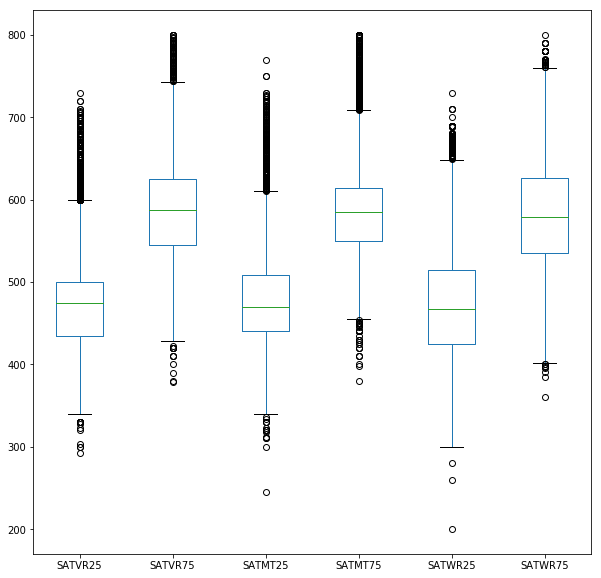

In [189]:
#df = pd.read_csv('Most-Recent-Cohorts-Scorecard-Elements.csv')
d=x[['SATVR25','SATVR75','SATMT25','SATMT75','SATWR25','SATWR75']]
d.plot.box()

## Inference from the above box plot:
•The lower number is for the 25th percentile of students who enrolled in (not just applied to) the college. For the school above, 25% of enrolled students received a math score of 590 or lower.
•The upper number is for the 75th percentile of students who enrolled in the college. For the above example, 75% of enrolled students got a math score of 740 or lower.
•For the school above, if you have an SAT math score of 745, you would be in the top 25% of applicants for that one measure. If you have a math score of 320, you are in the bottom 25% of applicants for that measure. 
•Being in the bottom 25% is obviously not ideal, and any candidate’s admissions chances will be lessened, but they still have a chance of getting in. Assuming the school has holistic admissions, factors such as strong letters of recommendation, a winning application essay, and meaningful extracurricular activities can all help compensate for less-than-ideal SAT scores.
•Same idea can be applied on SATVR critical thinking. 


### Displaying the distribution of ACT scores of students in the form of box plots

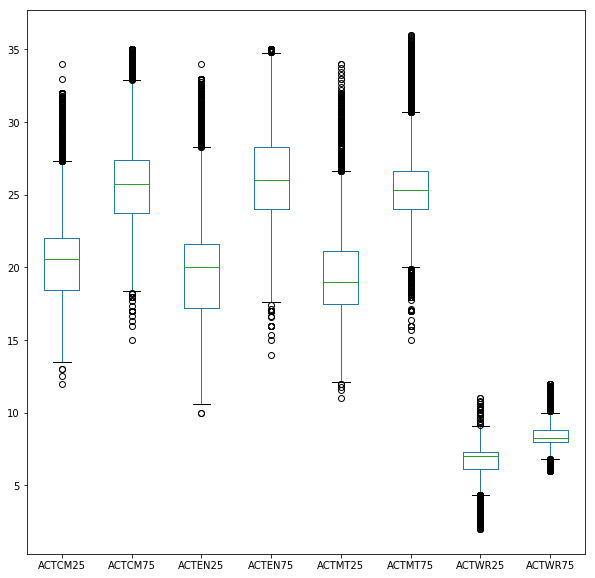

In [191]:
#df = pd.read_csv('Most-Recent-Cohorts-Scorecard-Elements.csv')
d=x[['ACTCM25','ACTCM75','ACTEN25','ACTEN75','ACTMT25','ACTMT75','ACTWR25','ACTWR75']]
d.plot.box()

## Inference from the above box plot:
•	The lower number is for the 25th percentile of students who enrolled in (not just applied to) the college. For the school above, 25% of enrolled students received an English score of 27 or lower.
•	The upper number is for the 75th percentile of students who enrolled in the college. For the above example, 75% of enrolled students got a math score of 35 or lower.
•	For the school above, if you have an ACT English score of 38, you would be in the top 25% of applicants for that one measure. If you have an ACT English score of 10, you are in the bottom 25% of applicants for that measure. 
•	Being in the bottom 25% is obviously not ideal, and any candidate’s admissions chances will be lessened, but they still have a chance of getting in. Assuming the school has holistic admissions, factors such as strong letters of recommendation, a winning application essay, and meaningful extracurricular activities can all help compensate for less-than-ideal SAT scores.
•	Same idea can be applied on ACTCM, ACTMT and ACTWR.



##### Displaying what percent of U.S. Colleges provide Distance Education

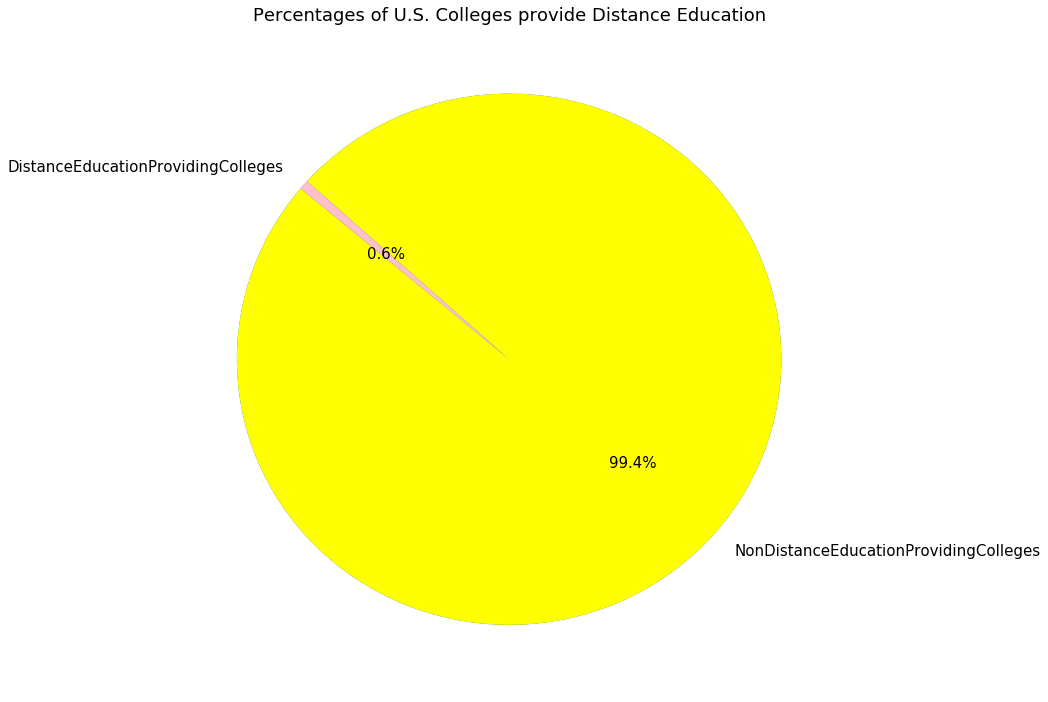

In [207]:
# Counting the number of Distance education providing and not providing colleges
NonDistanceEducationProvidingColleges = dx.DISTANCEONLY.value_counts()[0]
DistanceEducationProvidingColleges = dx.DISTANCEONLY.value_counts()[1]

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

#series = pd.Series(HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY, index=['HBCU','PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY','WOMENONLY'], name='series')
labels = 'NonDistanceEducationProvidingColleges','DistanceEducationProvidingColleges'
sizes = [NonDistanceEducationProvidingColleges,DistanceEducationProvidingColleges]

# Plot
patches, texts = plt.pie(sizes, startangle=90)
#plt.legend(labels, loc="best")
plt.title('Percentages of U.S. Colleges provide Distance Education')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['yellow', 'pink'])
plt.axis()
plt.tight_layout()
plt.show()

###### As observed, 0.6% of the colleges support Distance Education

##### Displaying the area distribution of enrollment of undergraduate certificate/degree-seeking students

C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'No. Of Students')

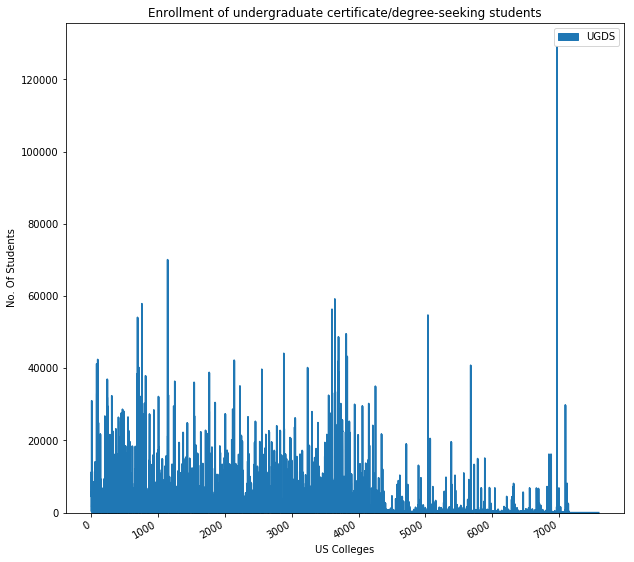

In [27]:
dx.plot(x=dx.index, y=["UGDS"], kind="area",subplots=True)
plt.title("Enrollment of undergraduate certificate/degree-seeking students")
plt.xlabel("US Colleges")
plt.ylabel("No. Of Students")

##### Resetting the figure size to 20 *20

In [37]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

Current size: [7.0, 9.0]


#### Displaying the percentage distribution of various ethnicities for all undergraduate degree seeking students. 

In [38]:
#Creating pie chart for colleges whose populations are predominantly ethinic minorities
#Taking the sum of each chunk 
dx = pd.read_csv('Final_Dataset.csv',sep=' ')

WHITE=dx['UGDS_WHITE'].sum()
BLACK=dx['UGDS_BLACK'].sum()
HISP= dx['UGDS_HISP'].sum()
ASIAN= dx['UGDS_ASIAN'].sum()
AMER_IND = dx['UGDS_AIAN'].sum()
NAT_HAWAI = dx['UGDS_NHPI'].sum()
#2MOR_RACE = dx['UGDS_2MOR'].sum()
#NONRESAL = dx['UGDS_NRA'].sum()


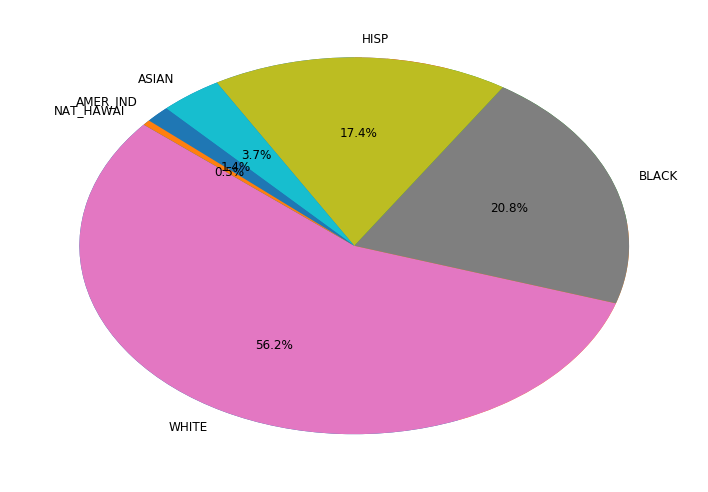

In [41]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0

#series = pd.Series(HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY, index=['HBCU','PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY','WOMENONLY'], name='series')
labels = 'WHITE','BLACK','HISP','ASIAN','AMER_IND','NAT_HAWAI'
sizes = [WHITE,BLACK,HISP,ASIAN,AMER_IND,NAT_HAWAI]

# Plot
patches, texts = plt.pie(sizes, startangle=90)
#plt.legend(patches, labels, loc="best")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis()
plt.tight_layout()
plt.show()

###### Among undergraduate degree seeking students, white ethnic population is leading with 56.5%  

#### Resizing the figure size to 8*6

In [148]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Current size: [10.0, 10.0]


#### Displaying the percentages of Operating versus Non-Operating Institutions in US

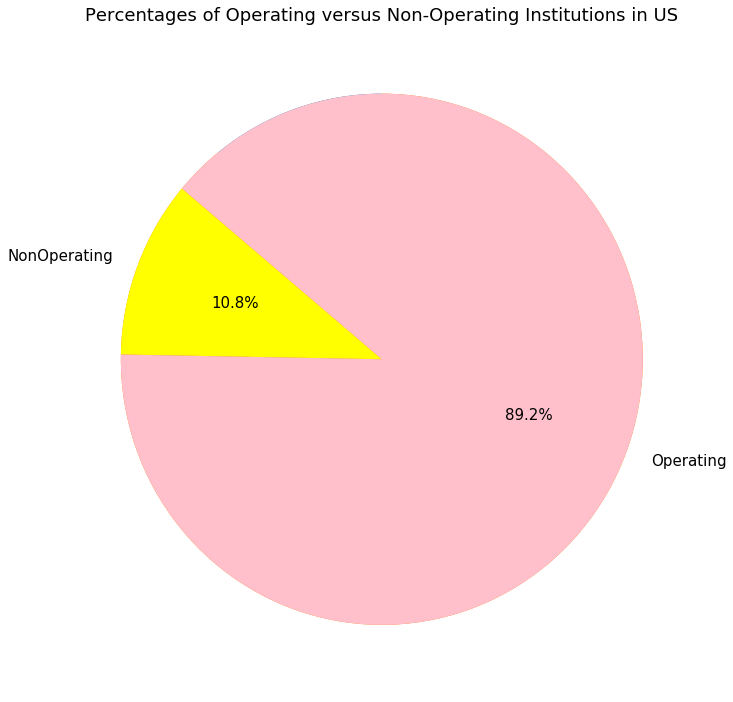

In [209]:
dx = pd.read_csv('Most-Recent-Cohorts-Scorecard-Elements.csv')
NonOperating = dx.CURROPER.value_counts()[0]
Operating = dx.CURROPER.value_counts()[1]

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

#series = pd.Series(HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY, index=['HBCU','PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY','WOMENONLY'], name='series')
labels = 'NonOperating','Operating'
sizes = [NonOperating,Operating]

# Plot
patches, texts = plt.pie(sizes, startangle=90)
#plt.legend(patches, labels, loc="best")
plt.title('Percentages of Operating versus Non-Operating Institutions in US')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['yellow', 'pink'])
plt.axis()
plt.tight_layout()
plt.show()

###### As observed, 10.8% of US colleges are not operational.

#### Resizing the figure size to 30*30

In [32]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [10.0, .0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

Current size: [8.0, 6.0]


##### Area distribution of various courses that are being offered in various fields such as Agriculture, Natural Resources, Ethnic Studies etc. 

C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,1,'Distribution of various Degrees awarded across all Universities')

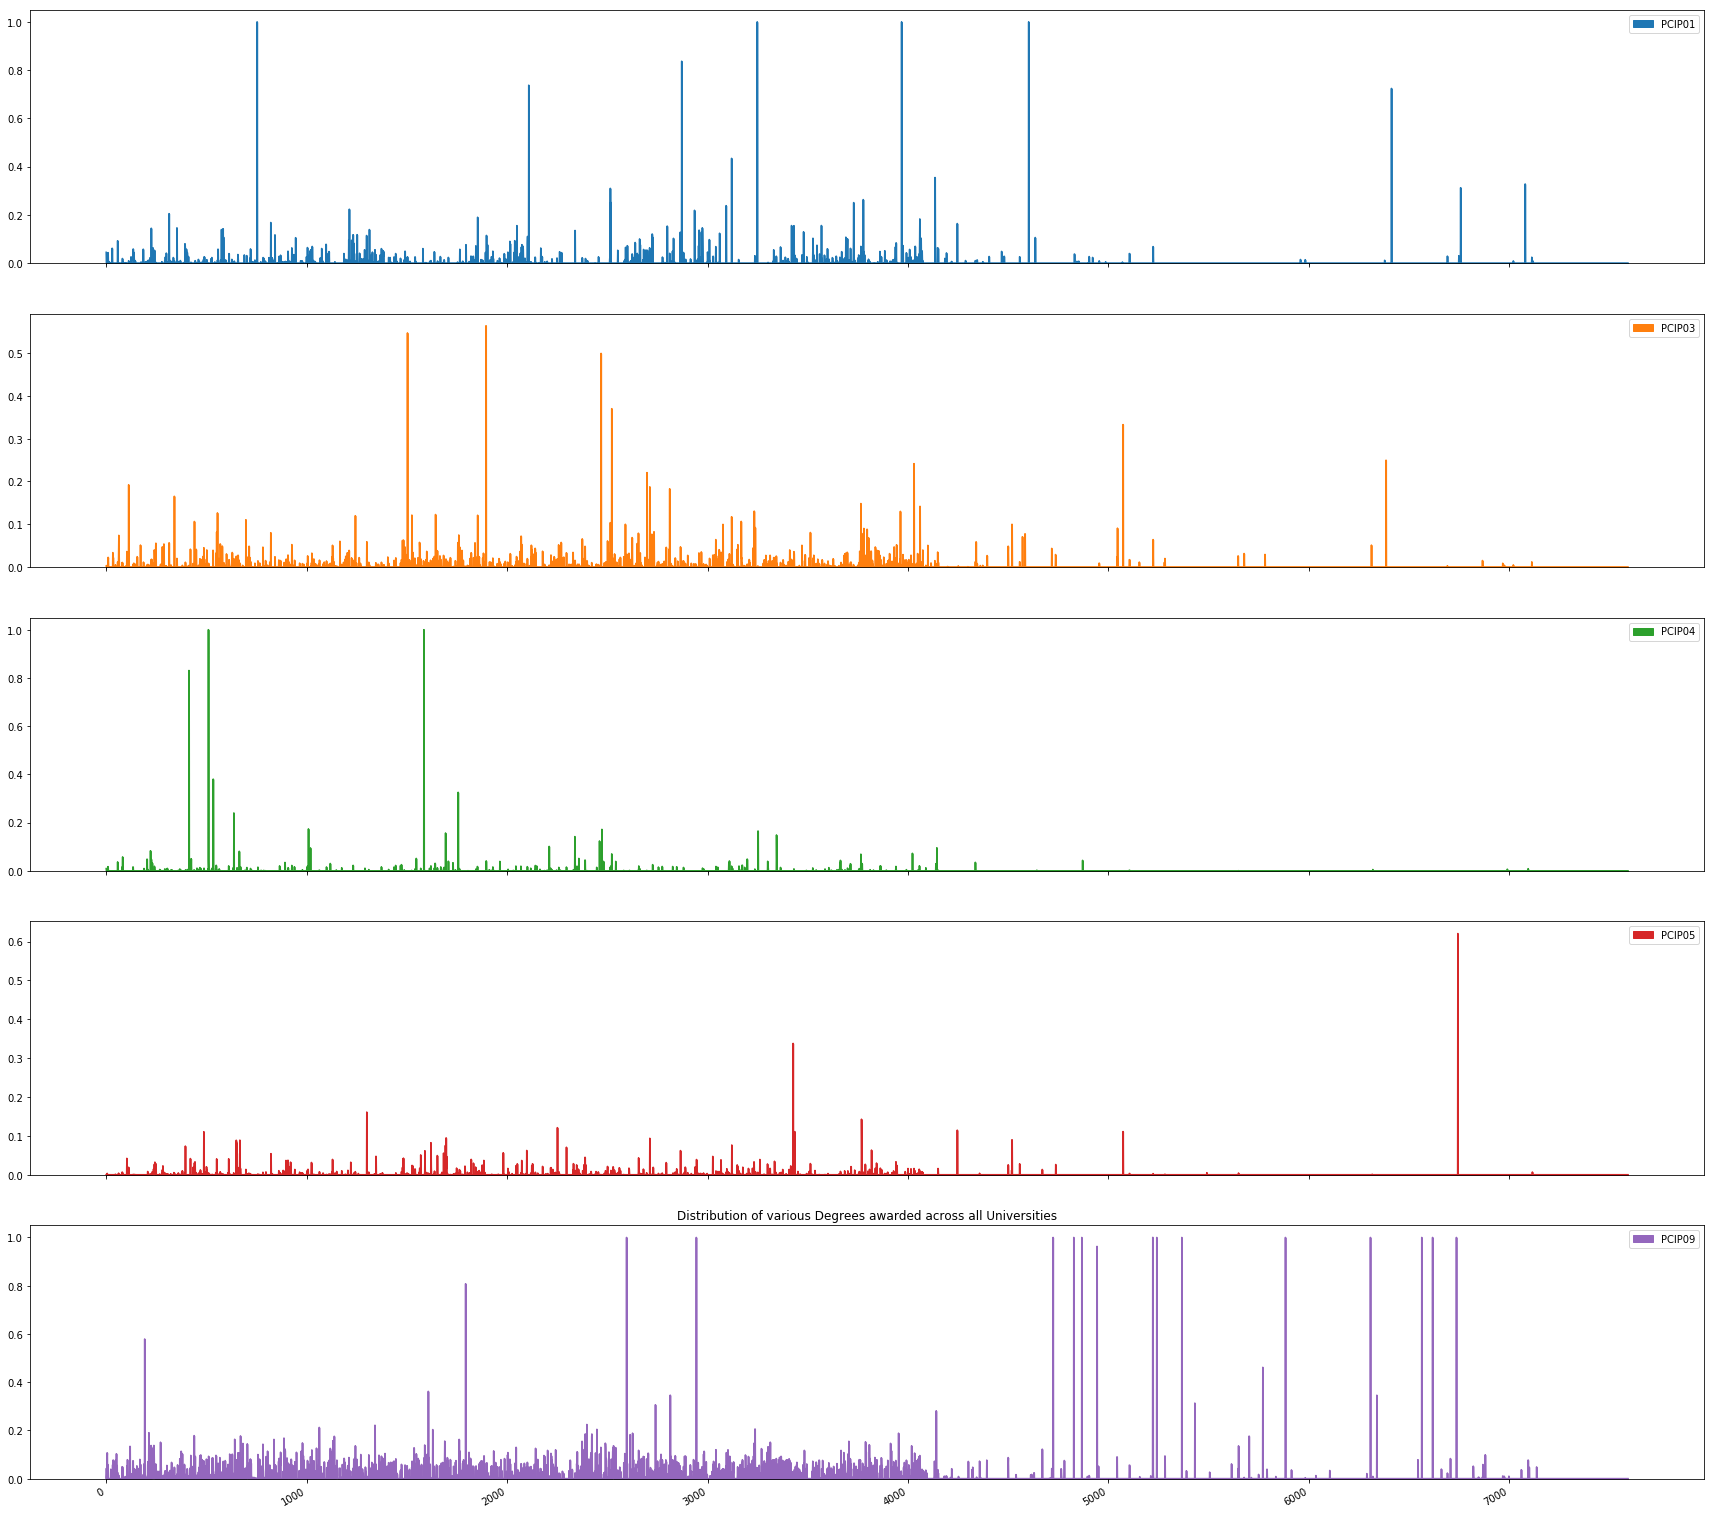

In [33]:
dx.plot(x=dx.index, y=["PCIP01","PCIP03","PCIP04","PCIP05","PCIP09"], kind="area",subplots=True)
plt.title("Distribution of various Degrees awarded across all Universities")

##### Applying Unsupervised Machine Learning to find clusters and hidden patterns in the data

In [34]:
#Creating a Feature Vector
x = d.iloc[:,:-1].values

In [35]:
standard_scalar = StandardScaler()

In [36]:
d_std = standard_scalar.fit_transform(x)

###### Finding the Number Classes using Elbow Curve

In [37]:
#We are computing the cluster errors from cluster range 1 to 20
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( d_std )
  cluster_errors.append( clusters.inertia_ )

In [38]:
#Displaying the number of clusters along with their corresponding cluster error values
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [39]:
#Displaying the number of clusters along with their corresponding cluster error values(Only first 10)
clusters_df[0:10]

,cluster_errors,num_clusters
0,811381.000000,1
1,735580.964951,2
2,704550.641061,3
3,681913.116313,4
4,666726.931173,5
5,653937.834021,6
6,643305.196641,7
7,631703.714666,8
8,622281.770175,9
9,609093.544859,10


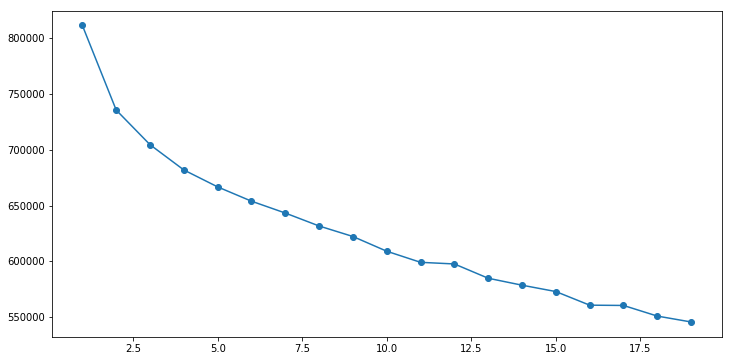

In [40]:
#Plotting the Elbow curve: 
#Y-Axis = Cost
#X-Axis = Number Of clusters
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

###### The elbow diagram shows that the gain in explained variance reduces significantly from 2 to 3 to 4. So, optimal number of clusters should be 2 . The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

###### Applying K-Means Algorithm

In [41]:
df_tr_std = stats.zscore(d)

In [42]:
##Init
kmeans = KMeans(n_clusters=2, random_state=123)
##Fit
kmeans.fit(df_tr_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

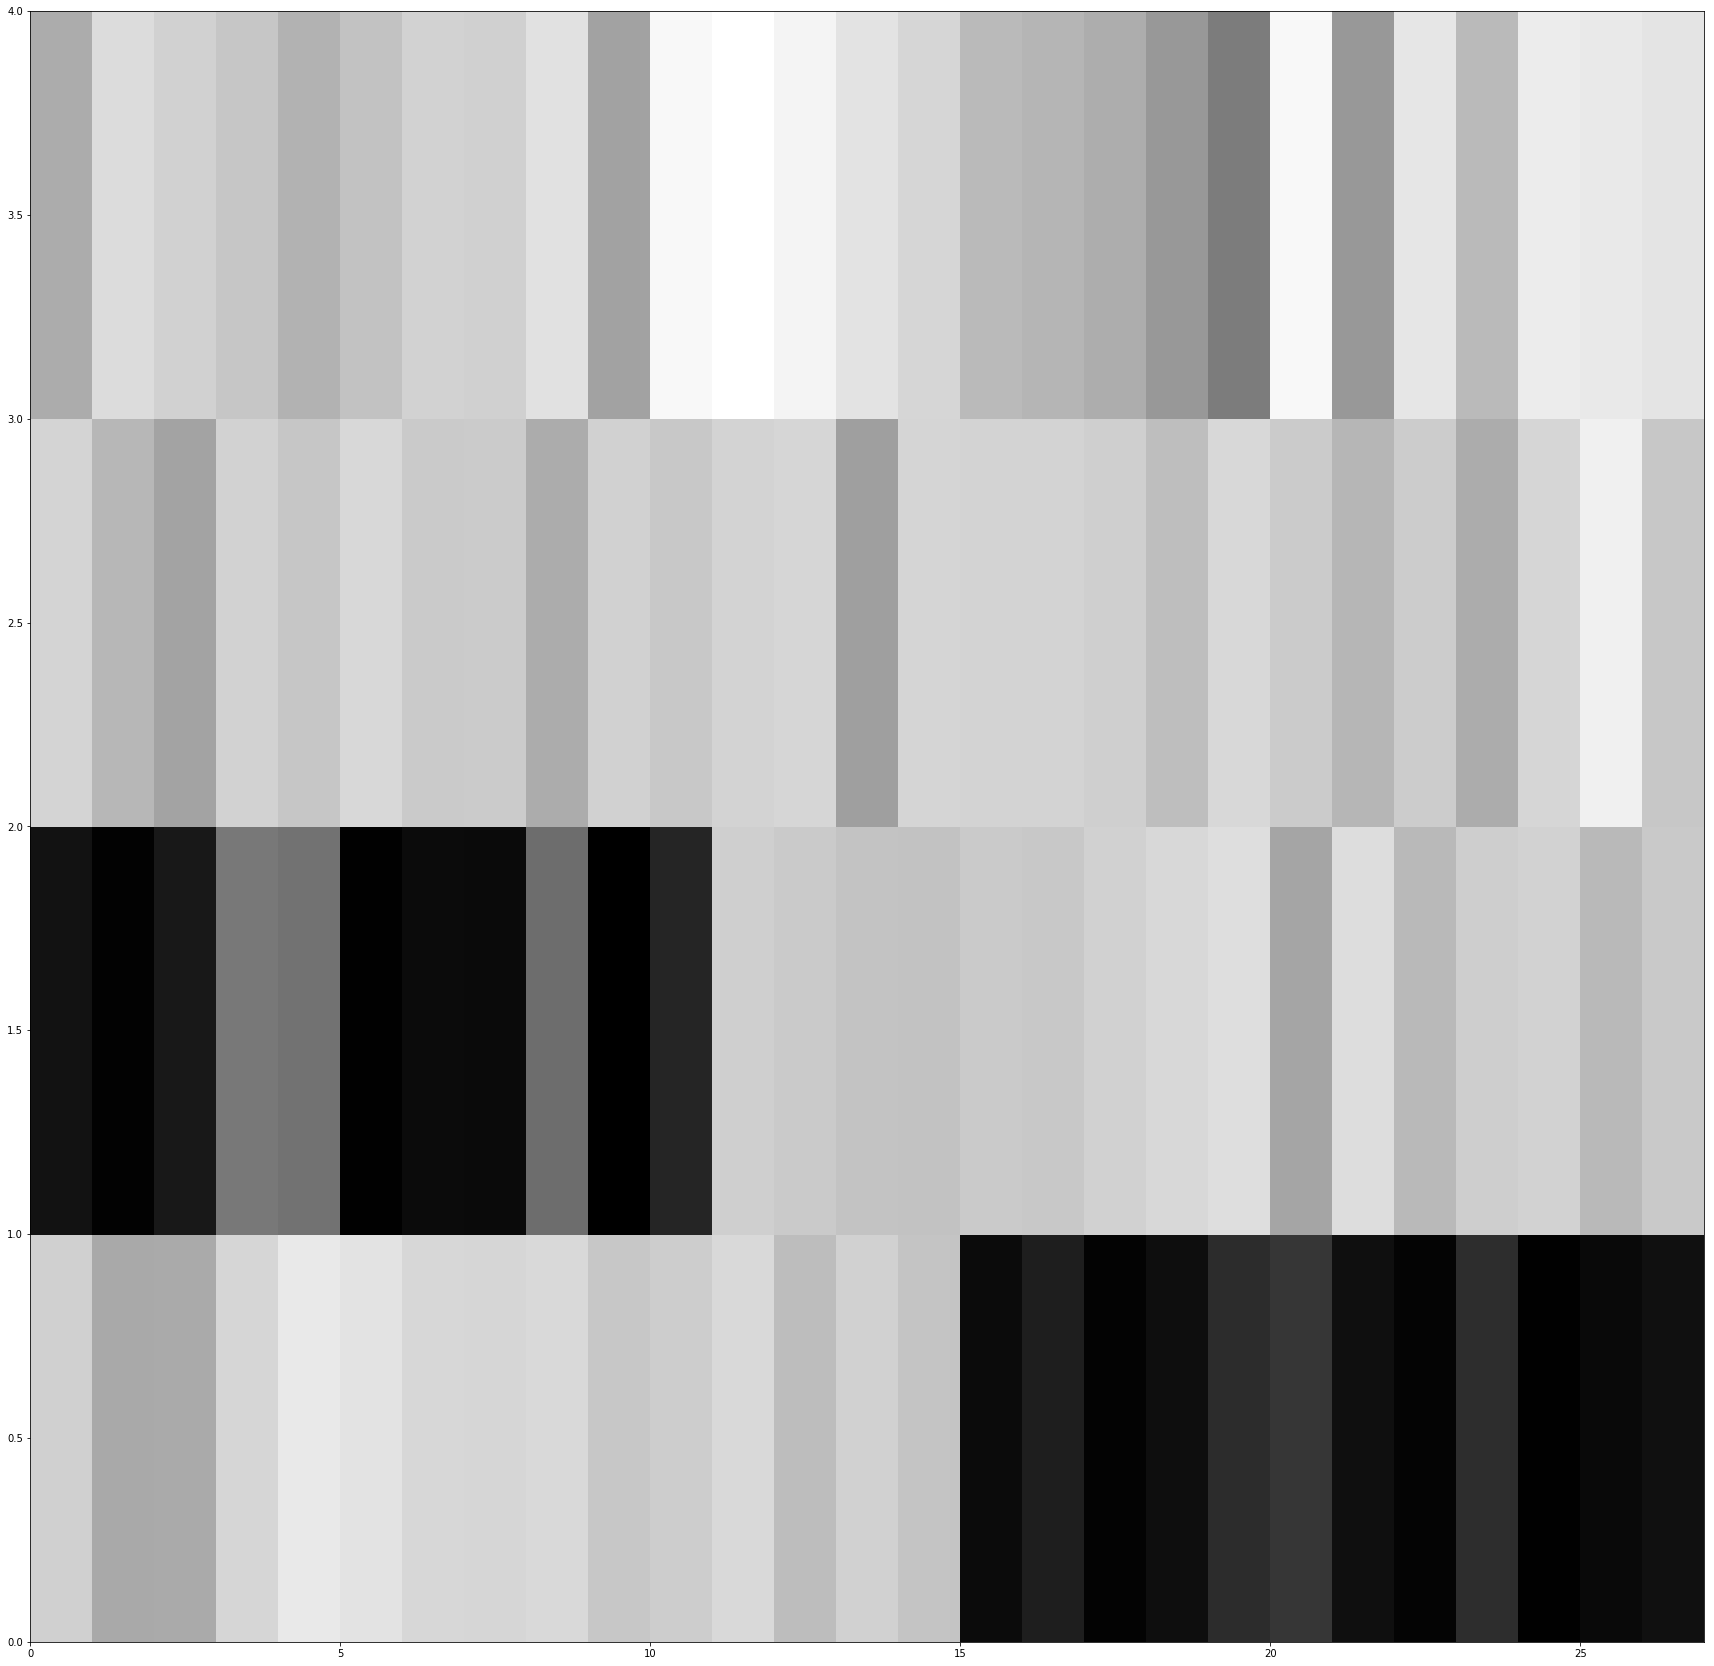

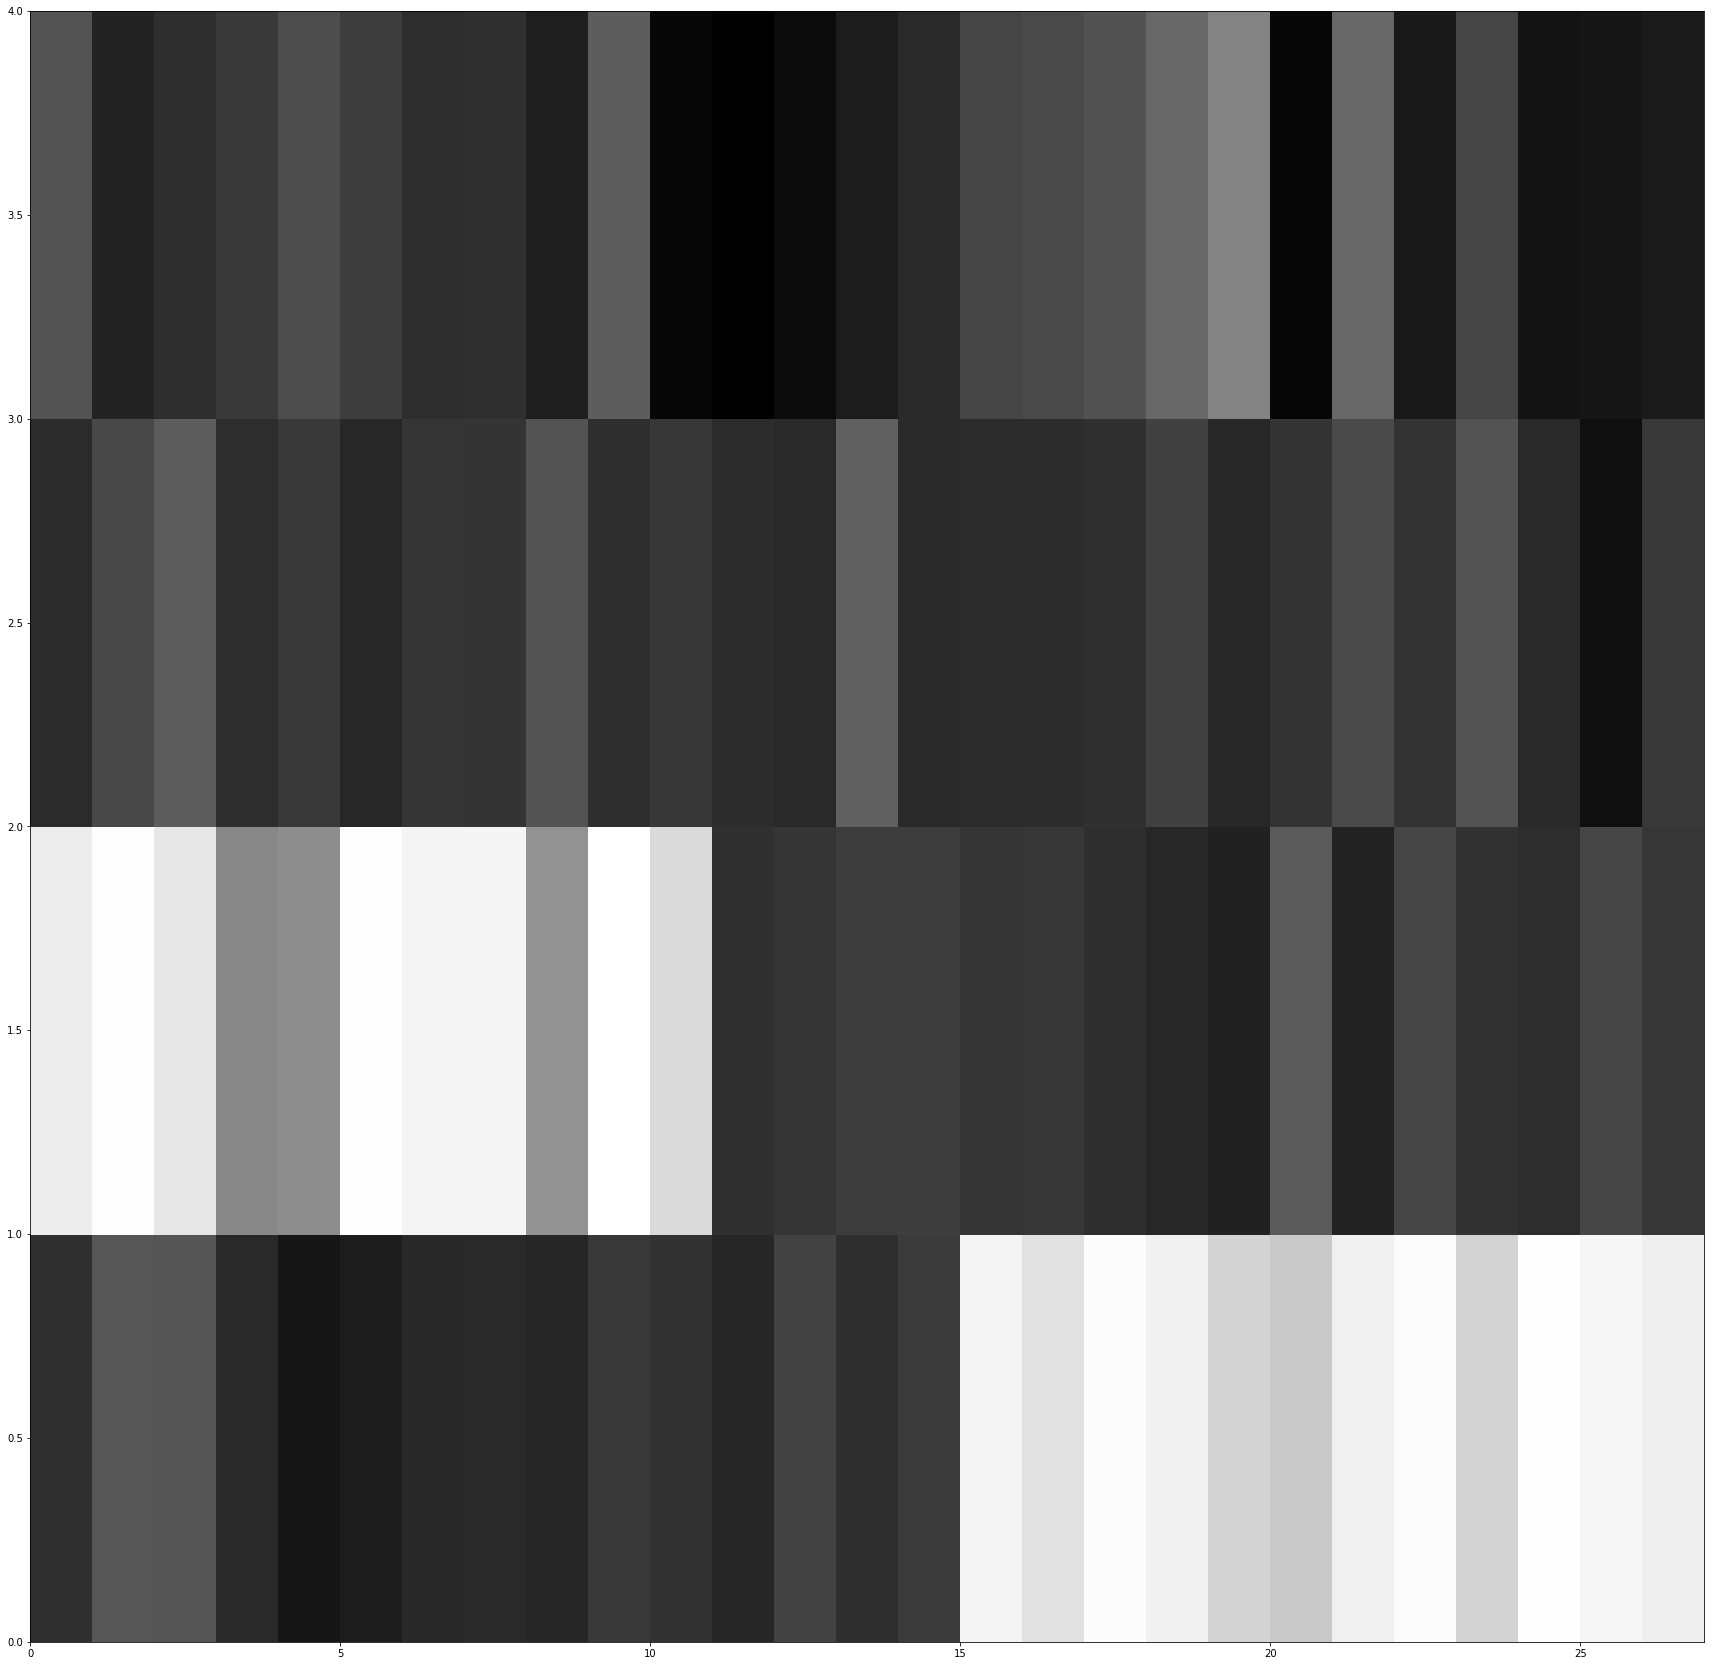

In [43]:
for i in range(2):
 plt.pcolor(np.reshape(kmeans.cluster_centers_[i,:],(4,27)))
 plt.gray()
 Black_patch = mpatches.Patch(color='white')
 White_patch = mpatches.Patch(color='black')
 #plt.legend(handles=[Black_patch,White_patch])
 plt.show()

#### Applying Distributed Stocastic Neighbor Embedding (DSNE) Machine Learning to plot 108 dimensions in a 2D plane

In [46]:
from sklearn.manifold import TSNE
from ggplot import *

C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [47]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [48]:
x_test_2D = tsne.fit_transform(d_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7583 samples in 0.205s...
[t-SNE] Computed neighbors for 7583 samples in 7.273s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7583
[t-SNE] Computed conditional probabilities for sample 2000 / 7583
[t-SNE] Computed conditional probabilities for sample 3000 / 7583
[t-SNE] Computed conditional probabilities for sample 4000 / 7583
[t-SNE] Computed conditional probabilities for sample 5000 / 7583
[t-SNE] Computed conditional probabilities for sample 6000 / 7583
[t-SNE] Computed conditional probabilities for sample 7000 / 7583
[t-SNE] Computed conditional probabilities for sample 7583 / 7583
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.321350
[t-SNE] Error after 300 iterations: 2.472771


##### Plotting a Scatter plot from the results obtained from above

In [49]:
df_tsne = d.copy()

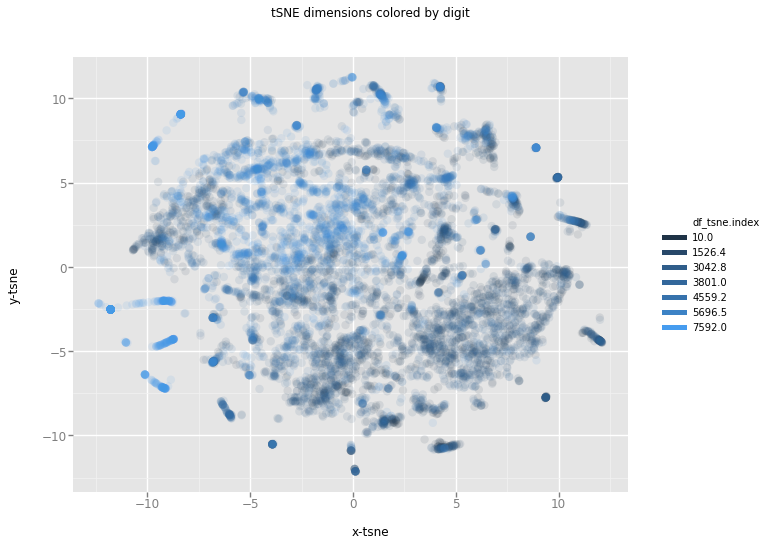

<ggplot: (-9223372036828677993)>

In [50]:

df_tsne['x-tsne'] = x_test_2D[:,0]
df_tsne['y-tsne'] = x_test_2D[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='df_tsne.index') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

###### The data points scattered around a mean. The only thing that catches the eye are the outliers as highlighted above. The cause of outliers is because some colleges impose tuition fees that are far above the average mean imposed by other colleges for particular student’s income groups. In my opinion, college ranking should be impacted if the college does not provide any scholarships to low-income students. 